<a href="https://colab.research.google.com/github/junhojjangjjangman/Capstone3/blob/main/%EC%BA%A1%EC%8A%A4%ED%86%A43.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np    # 선형 대수 지원 라이브러리
import pandas as pd   # 데이터 처리, CSV 파일 I/O(예: pd.read_csv)
import os

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import keras
from glob import glob
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
from PIL import Image
import numpy as np
import cv2
import os

In [ ]:
labels = ['O', 'R']
img_size = 150
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # 원하는 크기로 이미지 크기 변경
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [ ]:
train = get_training_data('/content/drive/MyDrive/Colab Notebooks/DataSet/DATASET/TRAIN')

test = get_training_data('/content/drive/MyDrive/Colab Notebooks/DataSet/DATASET/TEST')

# val = get_training_data('./chest_xray/val')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  from ipykernel import kernelapp as app


In [ ]:
img_size = 150
def get_sample_data(data_dir):
    data = []  
    path = os.path.join(data_dir)
    for img in os.listdir(path):
      try:
        img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        resized_arr = cv2.resize(img_arr, (img_size, img_size)) # 원하는 크기로 이미지 크기 변경
        data.append([resized_arr])
      except Exception as e:
        print(e)
    return np.array(data)

In [ ]:
OR = get_sample_data('/content/drive/MyDrive/Colab Notebooks/DataSet/DATASET/OR')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


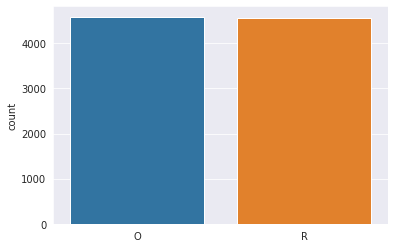

In [ ]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("O")
    else:
        l.append("R")
        
sns.set_style('darkgrid')
sns.countplot(l)        

In [ ]:
x_train = []
y_train = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)

In [ ]:
# 데이터 정규화
x_train = np.array(x_train) / 255
x_test = np.array(x_test) / 255

In [ ]:
OR = np.array(OR) / 255
OR = OR.reshape(-1, img_size, img_size, 1)

In [ ]:

x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,              # 데이터셋에 대해 입력 평균을 0으로 설정
        samplewise_center=False,               # 각 샘플 평균을 0으로 설정
        featurewise_std_normalization=False,   # 데이터 세트의 표준으로 입력 나눕니다.
        samplewise_std_normalization=False,    # 각 입력을 std로 나눕니다.
        width_shift_range=0.1,                 # 이미지를 가로로 무작위로 이동(전체 너비의 일부)
        height_shift_range=0.1) 


datagen.fit(x_train)

In [ ]:
model = Sequential()
model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (150,150,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1 , activation = 'sigmoid'))

In [ ]:
model.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 150, 150, 128)     1280      
                                                                 
 batch_normalization_18 (Bat  (None, 150, 150, 128)    512       
 chNormalization)                                                
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 75, 75, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 75, 75, 128)       147584    
                                                                 
 dropout_16 (Dropout)        (None, 75, 75, 128)       0         
                                                                 
 batch_normalization_19 (Bat  (None, 75, 75, 128)     

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

In [ ]:
history = model.fit(datagen.flow(x_train,y_train, batch_size = 32) ,epochs = 12 , validation_data = datagen.flow(x_test, y_test) ,callbacks = [learning_rate_reduction])

Epoch 1/12
287/287 [==============================] - 41s 127ms/step - loss: 0.8615 - accuracy: 0.6198 - val_loss: 0.7475 - val_accuracy: 0.5575 - lr: 0.0010
Epoch 2/12
287/287 [==============================] - 34s 118ms/step - loss: 0.5654 - accuracy: 0.7268 - val_loss: 0.6344 - val_accuracy: 0.6395 - lr: 0.0010
Epoch 3/12
287/287 [==============================] - 34s 119ms/step - loss: 0.5292 - accuracy: 0.7529 - val_loss: 0.6449 - val_accuracy: 0.6088 - lr: 0.0010
Epoch 4/12
287/287 [==============================] - 35s 121ms/step - loss: 0.5010 - accuracy: 0.7652 - val_loss: 0.5659 - val_accuracy: 0.7250 - lr: 0.0010
Epoch 5/12
287/287 [==============================] - 34s 118ms/step - loss: 0.4732 - accuracy: 0.7861 - val_loss: 0.7368 - val_accuracy: 0.6263 - lr: 0.0010
Epoch 6/12
287/287 [==============================] - 34s 118ms/step - loss: 0.4532 - accuracy: 0.7955 - val_loss: 0.5159 - val_accuracy: 0.8066 - lr: 0.0010
Epoch 7/12
287/287 [==============================] 

In [ ]:
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

79/79 [==============================] - 3s 39ms/step - loss: 0.5069 - accuracy: 0.7700
Loss of the model is -  0.5069258213043213
79/79 [==============================] - 3s 33ms/step - loss: 0.5069 - accuracy: 0.7700
Accuracy of the model is -  76.99960470199585 %


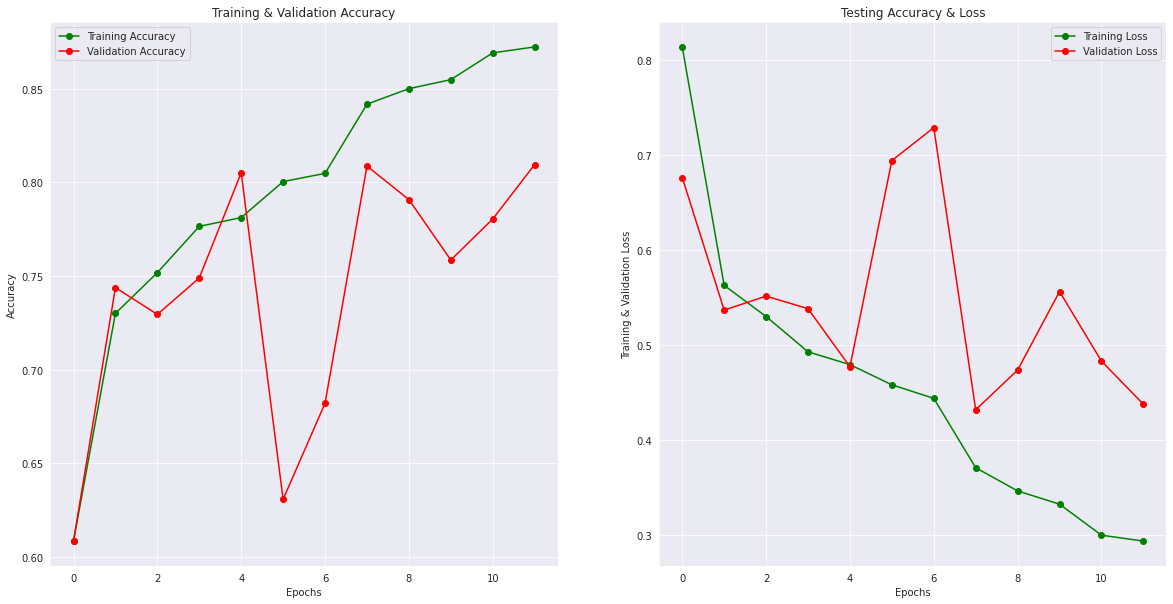

In [ ]:
epochs = [i for i in range(12)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

In [ ]:
predicted = (model.predict(x_test) > 0.5).astype("int32")
predictions = predicted.reshape(1,-1)[0]

predictions[:15]

79/79 [==============================] - 3s 30ms/step


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int32)

In [ ]:
print(classification_report(y_test, predictions, target_names = ['Pneumonia (Class 0)','Normal (Class 1)']))

                     precision    recall  f1-score   support

Pneumonia (Class 0)       0.85      0.71      0.78      1401
   Normal (Class 1)       0.70      0.84      0.76      1112

           accuracy                           0.77      2513
          macro avg       0.78      0.78      0.77      2513
       weighted avg       0.78      0.77      0.77      2513



In [ ]:
correct = np.nonzero(predictions == y_test)[0]
incorrect = np.nonzero(predictions != y_test)[0]

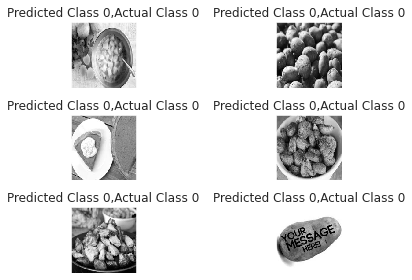

In [ ]:
i = 0
for c in correct[:6]:
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(150,150), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], y_test[c]))
    plt.tight_layout()
    i += 1

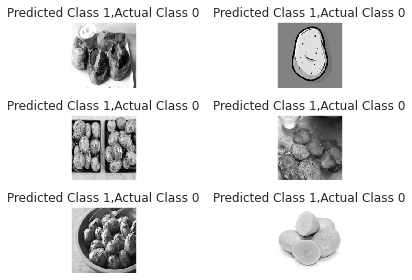

In [ ]:
i = 0
for c in incorrect[:6]:
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(150,150), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], y_test[c]))
    plt.tight_layout()
    i += 1

In [ ]:
predicted = (model.predict(OR) > 0.5).astype("int32")
predictions = predicted.reshape(1,-1)[0]

4/4 [==============================] - 0s 132ms/step


In [ ]:
score = 0
for i in range(100):
  if i < 50:
    if predictions[i] == 0:
      score += 1
  else:
    score += 1

print(score)


87
